In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
raw_data = pd.read_csv('./datasets/samsung202401.csv')
print(raw_data.head())
raw_data.info()

         Date    Open    High     Low   Close    Adj Close    Volume
0  2000-01-04  6000.0  6110.0  5660.0  6110.0  4514.580566  74195000
1  2000-01-05  5800.0  6060.0  5520.0  5580.0  4122.972168  74680000
2  2000-01-06  5750.0  5780.0  5580.0  5620.0  4152.527832  54390000
3  2000-01-07  5560.0  5670.0  5360.0  5540.0  4093.417969  40305000
4  2000-01-10  5600.0  5770.0  5580.0  5770.0  4263.360840  46880000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6033 entries, 0 to 6032
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6033 non-null   object 
 1   Open       6033 non-null   float64
 2   High       6033 non-null   float64
 3   Low        6033 non-null   float64
 4   Close      6033 non-null   float64
 5   Adj Close  6033 non-null   float64
 6   Volume     6033 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 330.1+ KB


In [3]:
raw_data['Date'] = pd.to_datetime(raw_data['Date'])     #date의 타입을 datetime으로 바꿔주기
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6033 entries, 0 to 6032
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       6033 non-null   datetime64[ns]
 1   Open       6033 non-null   float64       
 2   High       6033 non-null   float64       
 3   Low        6033 non-null   float64       
 4   Close      6033 non-null   float64       
 5   Adj Close  6033 non-null   float64       
 6   Volume     6033 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 330.1 KB


In [4]:
raw_data.set_index('Date',inplace=True)     #index를 바꿔준다
print(raw_data)

               Open     High      Low    Close     Adj Close    Volume
Date                                                                  
2000-01-04   6000.0   6110.0   5660.0   6110.0   4514.580566  74195000
2000-01-05   5800.0   6060.0   5520.0   5580.0   4122.972168  74680000
2000-01-06   5750.0   5780.0   5580.0   5620.0   4152.527832  54390000
2000-01-07   5560.0   5670.0   5360.0   5540.0   4093.417969  40305000
2000-01-10   5600.0   5770.0   5580.0   5770.0   4263.360840  46880000
...             ...      ...      ...      ...           ...       ...
2024-01-17  73100.0  73300.0  71000.0  71000.0  71000.000000  22683660
2024-01-18  71600.0  72000.0  70700.0  71700.0  71700.000000  17853397
2024-01-19  73500.0  74700.0  73000.0  74700.0  74700.000000  23363427
2024-01-22  75900.0  76000.0  75000.0  75100.0  75100.000000  19673375
2024-01-23  75700.0  75800.0  74500.0  74900.0  74900.000000   4686897

[6033 rows x 6 columns]


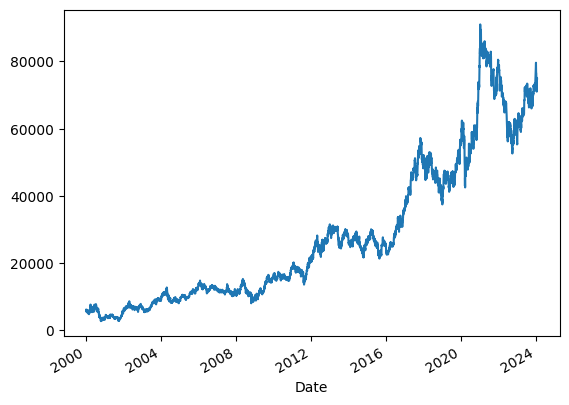

In [5]:
raw_data['Close'].plot()
plt.show()

In [6]:
data=raw_data['2021-01-03':'2024-01-22']
print(data.tail())
data.info()
print(data.shape)

               Open     High      Low    Close  Adj Close    Volume
Date                                                               
2024-01-16  73500.0  73700.0  72500.0  72600.0    72600.0  14760415
2024-01-17  73100.0  73300.0  71000.0  71000.0    71000.0  22683660
2024-01-18  71600.0  72000.0  70700.0  71700.0    71700.0  17853397
2024-01-19  73500.0  74700.0  73000.0  74700.0    74700.0  23363427
2024-01-22  75900.0  76000.0  75000.0  75100.0    75100.0  19673375
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 752 entries, 2021-01-04 to 2024-01-22
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       752 non-null    float64
 1   High       752 non-null    float64
 2   Low        752 non-null    float64
 3   Close      752 non-null    float64
 4   Adj Close  752 non-null    float64
 5   Volume     752 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 41.1 KB
(752, 6)


In [9]:
minmax_scaler = MinMaxScaler()
scaled_data = minmax_scaler.fit_transform(data)
print(scaled_data[:5])
print(scaled_data.shape)

[[0.75526316 0.71296296 0.75331565 0.79166667 0.78096721 0.42804687]
 [0.77105263 0.70138889 0.79045093 0.81510417 0.80560918 0.3912874 ]
 [0.81578947 0.71527778 0.80371353 0.77083333 0.75906427 0.46607014]
 [0.80263158 0.70833333 0.81962865 0.7890625  0.77822954 0.36148847]
 [0.81578947 0.84259259 0.82758621 0.94270833 0.93976607 0.65348029]]
(752, 6)


In [11]:
sequence_x = []
sequence_y = []
for i in range(len(scaled_data)-30):
    x = scaled_data[i:i+30]
    y = scaled_data[i+30][3]
    sequence_x.append(x)
    sequence_y.append(y)

In [12]:
sequence_x = np.array(sequence_x)
sequence_y = np.array(sequence_y)
print(sequence_x[0])
print(sequence_y[0])
print(sequence_x.shape)
print(sequence_y.shape)

[[0.75526316 0.71296296 0.75331565 0.79166667 0.78096721 0.42804687]
 [0.77105263 0.70138889 0.79045093 0.81510417 0.80560918 0.3912874 ]
 [0.81578947 0.71527778 0.80371353 0.77083333 0.75906427 0.46607014]
 [0.80263158 0.70833333 0.81962865 0.7890625  0.77822954 0.36148847]
 [0.81578947 0.84259259 0.82758621 0.94270833 0.93976607 0.65348029]
 [0.99210526 1.         1.         1.         1.         1.        ]
 [1.         0.875      0.95490716 0.98958333 0.98904819 0.5390818 ]
 [0.98684211 0.87037037 0.98938992 0.96614583 0.96440668 0.39940621]
 [0.95789474 0.84259259 0.97877984 0.96614583 0.96440668 0.29227203]
 [0.98684211 0.88425926 0.9602122  0.921875   0.91786268 0.37020512]
 [0.90263158 0.78009259 0.85676393 0.84375    0.83572581 0.47868211]
 [0.84736842 0.7962963  0.84350133 0.89583333 0.89048372 0.44177536]
 [0.96578947 0.81944444 0.9204244  0.90104167 0.89595951 0.27917389]
 [0.92631579 0.81018519 0.9204244  0.92447917 0.92060035 0.28035747]
 [0.96578947 0.83564815 0.92838196

In [26]:
x_train,x_test,y_train,y_test = train_test_split(sequence_x,sequence_y,test_size=0.2)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(577, 30, 6) (577,)
(145, 30, 6) (145,)


In [27]:
model = Sequential()
model.add(GRU(50,input_shape=(x_train.shape[1],x_train.shape[2]),return_sequences=True,activation='tanh'))
model.add(GRU(50,return_sequences=True,activation='tanh'))
model.add(Flatten())
model.add(Dense(1))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2 (GRU)                 (None, 30, 50)            8700      
                                                                 
 flatten_2 (Flatten)         (None, 1500)              0         
                                                                 
 dense_2 (Dense)             (None, 1)                 1501      
                                                                 
 flatten_3 (Flatten)         (None, 1)                 0         
                                                                 
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
Total params: 10203 (39.86 KB)
Trainable params: 10203 (39.86 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss='mse',optimizer='adam')
fit_hist = model.fit(x_train,y_train,epochs=100,
                     validation_data=(x_test,y_test),shuffle=False)#shuffle을 줘야함

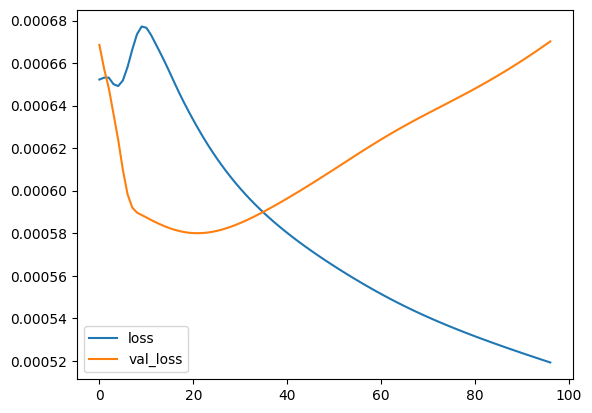

In [30]:
plt.plot(fit_hist.history['loss'][3:],label='loss')
plt.plot(fit_hist.history['val_loss'][3:],label='val_loss')
plt.legend()
plt.show()

In [35]:
predict = model.predict(x_test)

5/5 [==============================] - 0s 7ms/step


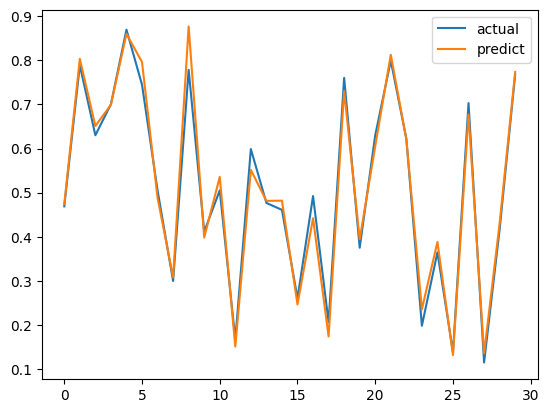

In [36]:
plt.plot(y_test[:30],label='actual')
plt.plot(predict[:30],label='predict')
plt.legend()
plt.show()

In [38]:
last_data_30 = scaled_data[-30:].reshape(1,30,6)
today_close = model.predict(last_data_30)
print(today_close)

1/1 [==============================] - 0s 27ms/step
[[0.5701391]]


In [39]:
temp = np.array([0,0,0,today_close[0][0],0,0]).reshape(1,6)
today_close_won = minmax_scaler.inverse_transform(temp)
print(today_close_won[0][3],'원')

74493.34182739258 원
